In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
names = ['age','workclass','fnlwgt','education','education-num','marital-status' ,  'occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','income']
df_train = pd.read_csv('adult.data.txt',index_col=False,delim_whitespace=True,names=names,na_values='?')
df_test = pd.read_csv('adult.test.txt',index_col=False,delim_whitespace=True,names=names,na_values='?')
df_train.dropna()
df_test.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.


In [5]:
from sklearn.preprocessing import LabelEncoder
# Hint: Now use a for loop over the elements in `le_category` and update df_le #TODO
encoder = LabelEncoder()

ohc_category = ['workclass', 'relationship' 
                 ,'native-country','occupation']
le_category=['sex','income','education','race','marital-status']

df_ohc_train = pd.get_dummies(df_train,columns=ohc_category) 
df_ohc_test = pd.get_dummies(df_test,columns=ohc_category) 


df_le_train = df_ohc_train.copy()
df_le_test = df_ohc_test.copy()
for i in range (len(le_category)):
    df_le_train[le_category[i]]  =encoder.fit_transform(df_le_train[le_category[i]])
    df_le_test[le_category[i]]  =encoder.fit_transform(df_le_test[le_category[i]])

df_le_test.head(6)

,age,fnlwgt,education,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,1,7,4,2,1,0,0,40,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,11,9,2,4,1,0,0,50,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,7,12,2,4,1,0,0,40,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,15,10,2,2,1,7688,0,40,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,15,10,4,4,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0
5,34,198693,0,6,4,4,1,0,0,30,...,0,0,0,1,0,0,0,0,0,0


In [6]:
X_df_train = np.array(df_le_train.drop(['income'],axis=1))
y_train = np.array(df_le_train['income'])
X_df_test = np.array(df_le_test.drop(['income'],axis=1))
y_test = np.array(df_le_test['income'])

nsamples,nfeatures=X_df_train.shape
print (' number of Train samples:{0} and number of features :{1}'.format(nsamples,nfeatures ))
nsamples,nfeatures=X_df_test.shape
print (' number of Test samples:{0} and number of features :{1}'.format(nsamples,nfeatures ))


 number of Train samples:32560 and number of features :78
 number of Test samples:16281 and number of features :78


In [7]:
import keras
from sklearn import preprocessing
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Xtr_mean = np.mean(X_df_train,axis=0)
Xtr_std = np.std(X_df_train,axis=0)
Xtr_scale = (X_df_train-Xtr_mean)/Xtr_std[None,:]
Xts_scale = (X_df_test-Xtr_mean[None,:])/Xtr_std[None,:]


/Users/weijian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
import keras.backend as K
K.clear_session()


In [9]:
nin = Xtr_scale.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = int(2)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation='softmax', name='output'))

print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
from keras import optimizers
opt = optimizers.Adam(lr=0.02 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(Xtr_scale, y_train, epochs=30, batch_size=100, validation_data=(Xts_scale,y_test))

Train on 32560 samples, validate on 16281 samples
Epoch 1/30
32560/32560 [==============================] - 1s 20us/step - loss: 0.3472 - acc: 0.8402 - val_loss: 0.3272 - val_acc: 0.8482
Epoch 2/30
32560/32560 [==============================] - 1s 17us/step - loss: 0.3236 - acc: 0.8499 - val_loss: 0.3297 - val_acc: 0.8511
Epoch 3/30
32560/32560 [==============================] - 1s 18us/step - loss: 0.3145 - acc: 0.8524 - val_loss: 0.3181 - val_acc: 0.8527
Epoch 4/30
32560/32560 [==============================] - 1s 16us/step - loss: 0.3112 - acc: 0.8564 - val_loss: 0.3166 - val_acc: 0.8555
Epoch 5/30
32560/32560 [==============================] - 1s 15us/step - loss: 0.3073 - acc: 0.8582 - val_loss: 0.3216 - val_acc: 0.8562
Epoch 6/30
32560/32560 [==============================] - 1s 16us/step - loss: 0.3056 - acc: 0.8585 - val_loss: 0.3236 - val_acc: 0.8540
Epoch 7/30
32560/32560 [==============================] - 1s 16us/step - loss: 0.3016 - acc: 0.8611 - val_loss: 0.3194 - val_acc

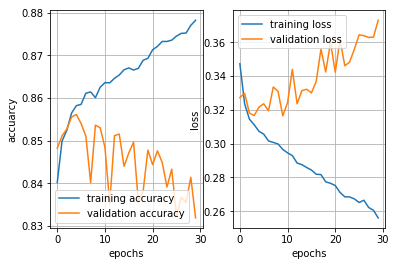

In [12]:
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss =  hist.history['val_loss']

plt.subplot(1,2,1)
plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

plt.subplot(1,2,2)
plt.plot(loss)
plt.plot(val_loss)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])